# Notebook for visualizing COVAREP features and modelling

Visualization of COVAREP data to assess feature selection and looking for correlation between features and label. Dimensionality reduction using Principal Components Analysis (PCA). Model fitting using linear regression, gradient boosting and random forest.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


from imblearn.over_sampling import SMOTE



In [2]:
#import data of mean for every feature for each participant
data = pd.read_csv('COVAREP_and_depression_data_mean.csv')
data.head(5)

,Unnamed: 0,F0,VUV,NAQ,QOQ,H1H2,PSP,MDQ,peakSlope,Rd,...,HMPDD_7,HMPDD_8,HMPDD_9,HMPDD_10,HMPDD_11,HMPDD_12,PHQ8_Binary,PHQ8_Score,Gender,patientId
0,0,153.594993,1.0,0.106205,0.342255,2.374461,0.295947,0.122276,-0.345056,1.443603,...,-0.485182,-0.398215,-0.309372,-0.221603,-0.150994,-0.085740,0.0,2.0,1.0,300.0
1,0,115.832283,1.0,0.102055,0.362536,-0.255189,0.217295,0.091380,-0.395940,1.296101,...,-0.441811,-0.436391,-0.355014,-0.344293,-0.272294,-0.199341,0.0,3.0,1.0,301.0
2,0,125.675550,1.0,0.063829,0.235365,2.326957,0.475797,0.114153,-0.408465,1.679126,...,-0.510800,-0.447550,-0.406698,-0.350424,-0.297138,-0.232945,0.0,4.0,1.0,302.0
3,0,199.187302,1.0,0.119407,0.423627,5.859107,0.267404,0.112478,-0.359892,1.506194,...,-0.447727,-0.337174,-0.176141,-0.080596,0.005553,0.081089,0.0,0.0,0.0,303.0
4,0,218.017081,1.0,0.117237,0.386444,5.060366,0.268287,0.116142,-0.354865,1.470331,...,-0.404727,-0.238044,-0.106150,-0.002209,0.068352,0.127041,0.0,6.0,0.0,304.0


In [3]:
#Drop columns VUV (information about when participant is speaking, which is all 1's ) and patientId
data.drop('VUV', axis = 1, inplace = True)
data.drop('patientId', axis = 1, inplace = True)

data.head()

,Unnamed: 0,F0,NAQ,QOQ,H1H2,PSP,MDQ,peakSlope,Rd,Rd_conf,...,HMPDD_6,HMPDD_7,HMPDD_8,HMPDD_9,HMPDD_10,HMPDD_11,HMPDD_12,PHQ8_Binary,PHQ8_Score,Gender
0,0,153.594993,0.106205,0.342255,2.374461,0.295947,0.122276,-0.345056,1.443603,0.532948,...,-0.600582,-0.485182,-0.398215,-0.309372,-0.221603,-0.150994,-0.085740,0.0,2.0,1.0
1,0,115.832283,0.102055,0.362536,-0.255189,0.217295,0.091380,-0.395940,1.296101,0.707994,...,-0.552128,-0.441811,-0.436391,-0.355014,-0.344293,-0.272294,-0.199341,0.0,3.0,1.0
2,0,125.675550,0.063829,0.235365,2.326957,0.475797,0.114153,-0.408465,1.679126,0.630948,...,-0.569240,-0.510800,-0.447550,-0.406698,-0.350424,-0.297138,-0.232945,0.0,4.0,1.0
3,0,199.187302,0.119407,0.423627,5.859107,0.267404,0.112478,-0.359892,1.506194,0.672752,...,-0.648388,-0.447727,-0.337174,-0.176141,-0.080596,0.005553,0.081089,0.0,0.0,0.0
4,0,218.017081,0.117237,0.386444,5.060366,0.268287,0.116142,-0.354865,1.470331,0.641787,...,-0.602905,-0.404727,-0.238044,-0.106150,-0.002209,0.068352,0.127041,0.0,6.0,0.0


## Data visualization

Histogram for each feature

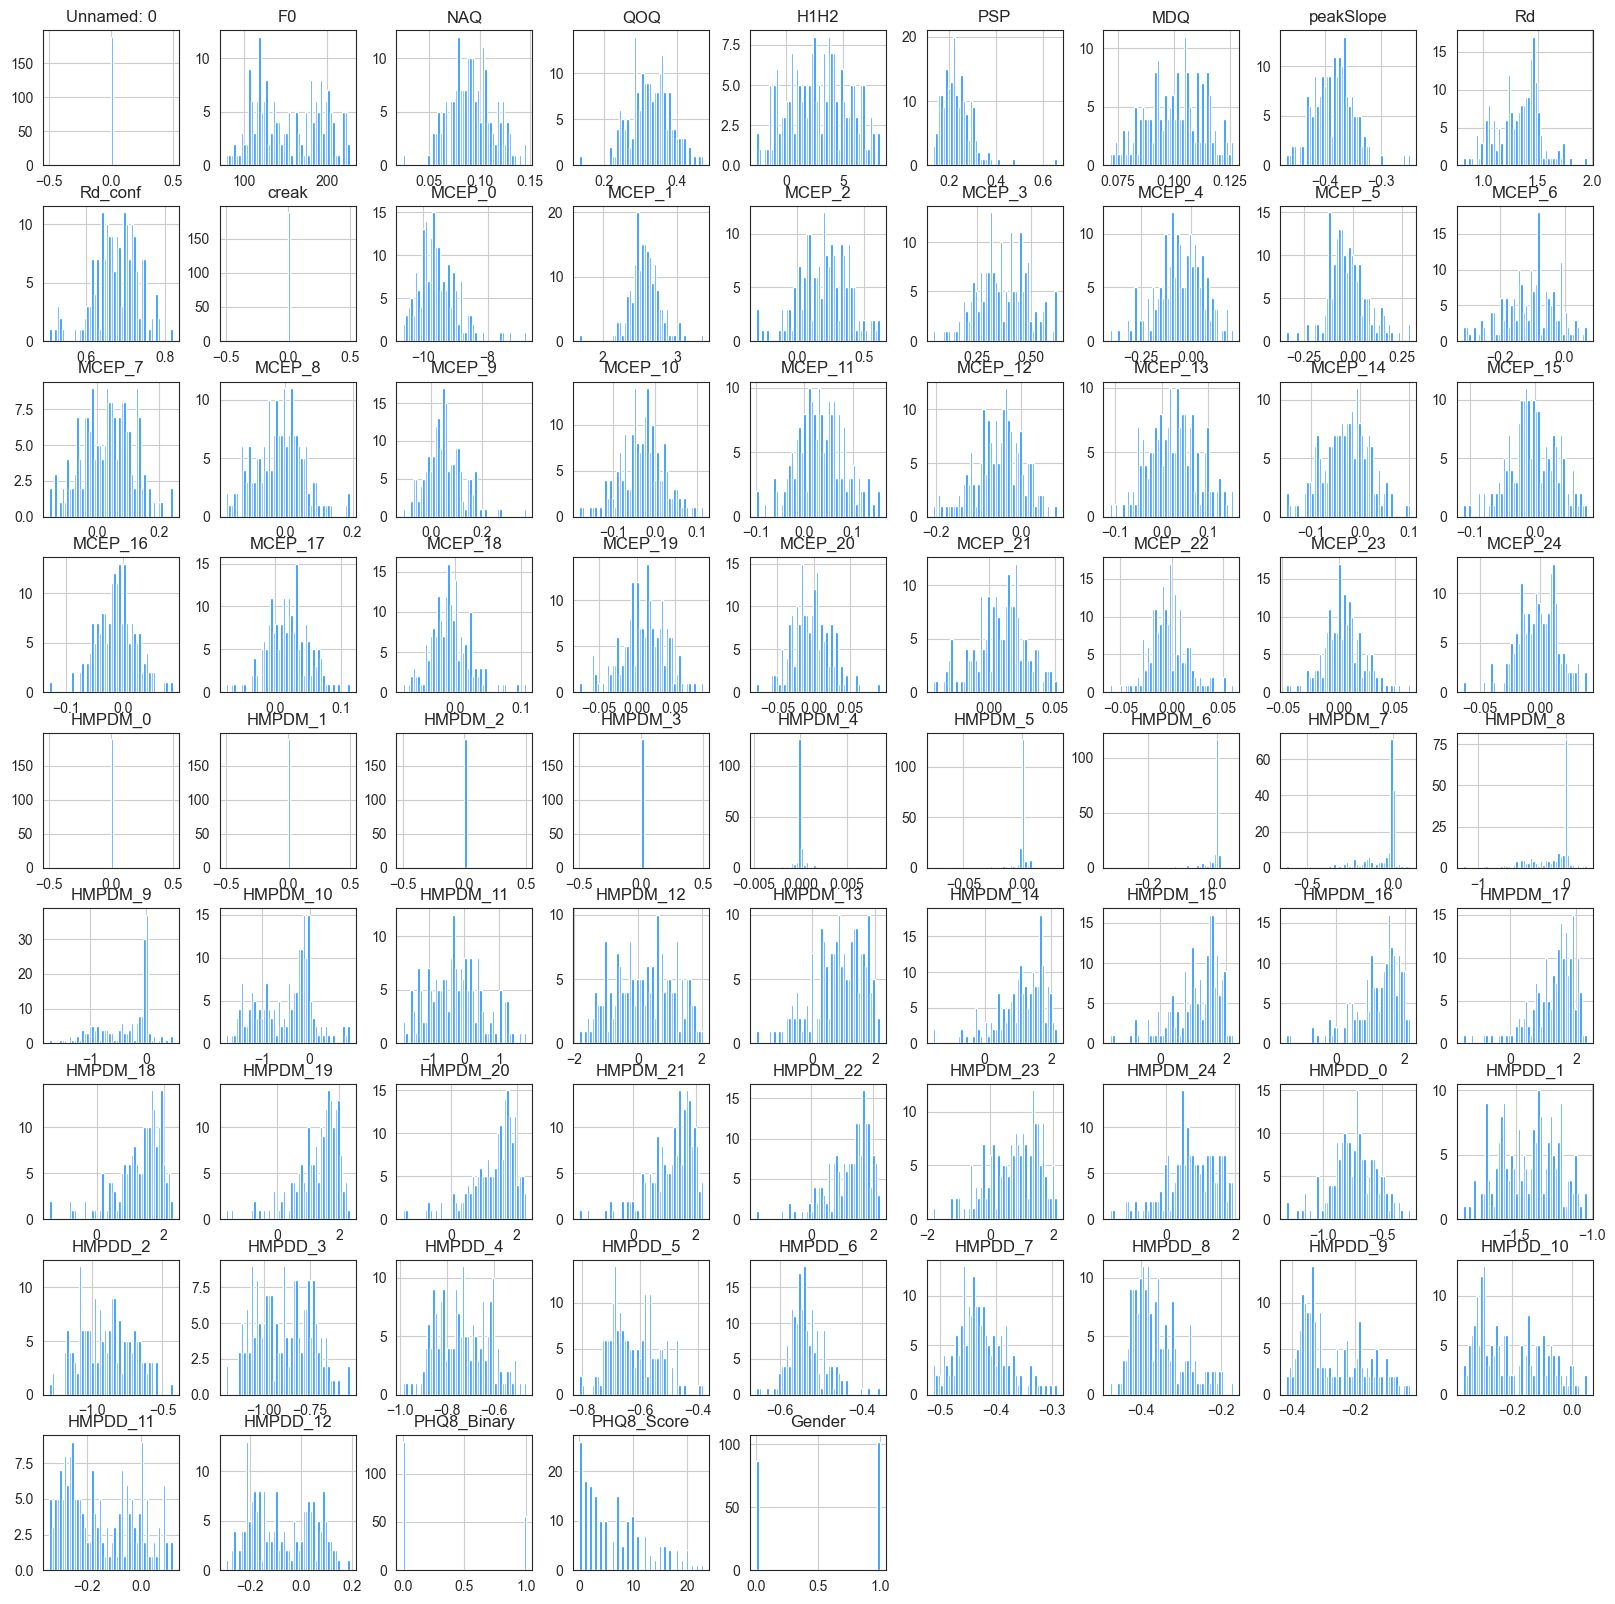

In [4]:
sns.set_style('white')
data.hist(bins=50,figsize=(20,20),color='dodgerblue');

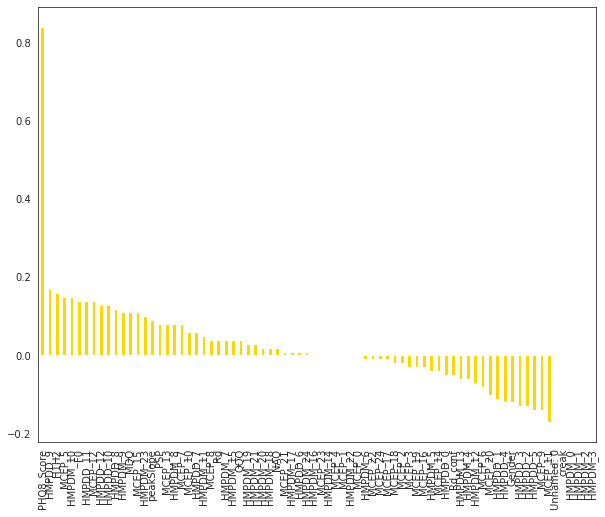

<Figure size 5760x4320 with 0 Axes>

In [ ]:
#Visualizing correlation of features with label (PHQ8_Binary) to select 
ca = round(data.corr()['PHQ8_Binary'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='gold' , figsize = (10,8))
plt.figure(figsize=(80,60))
plt.show() 

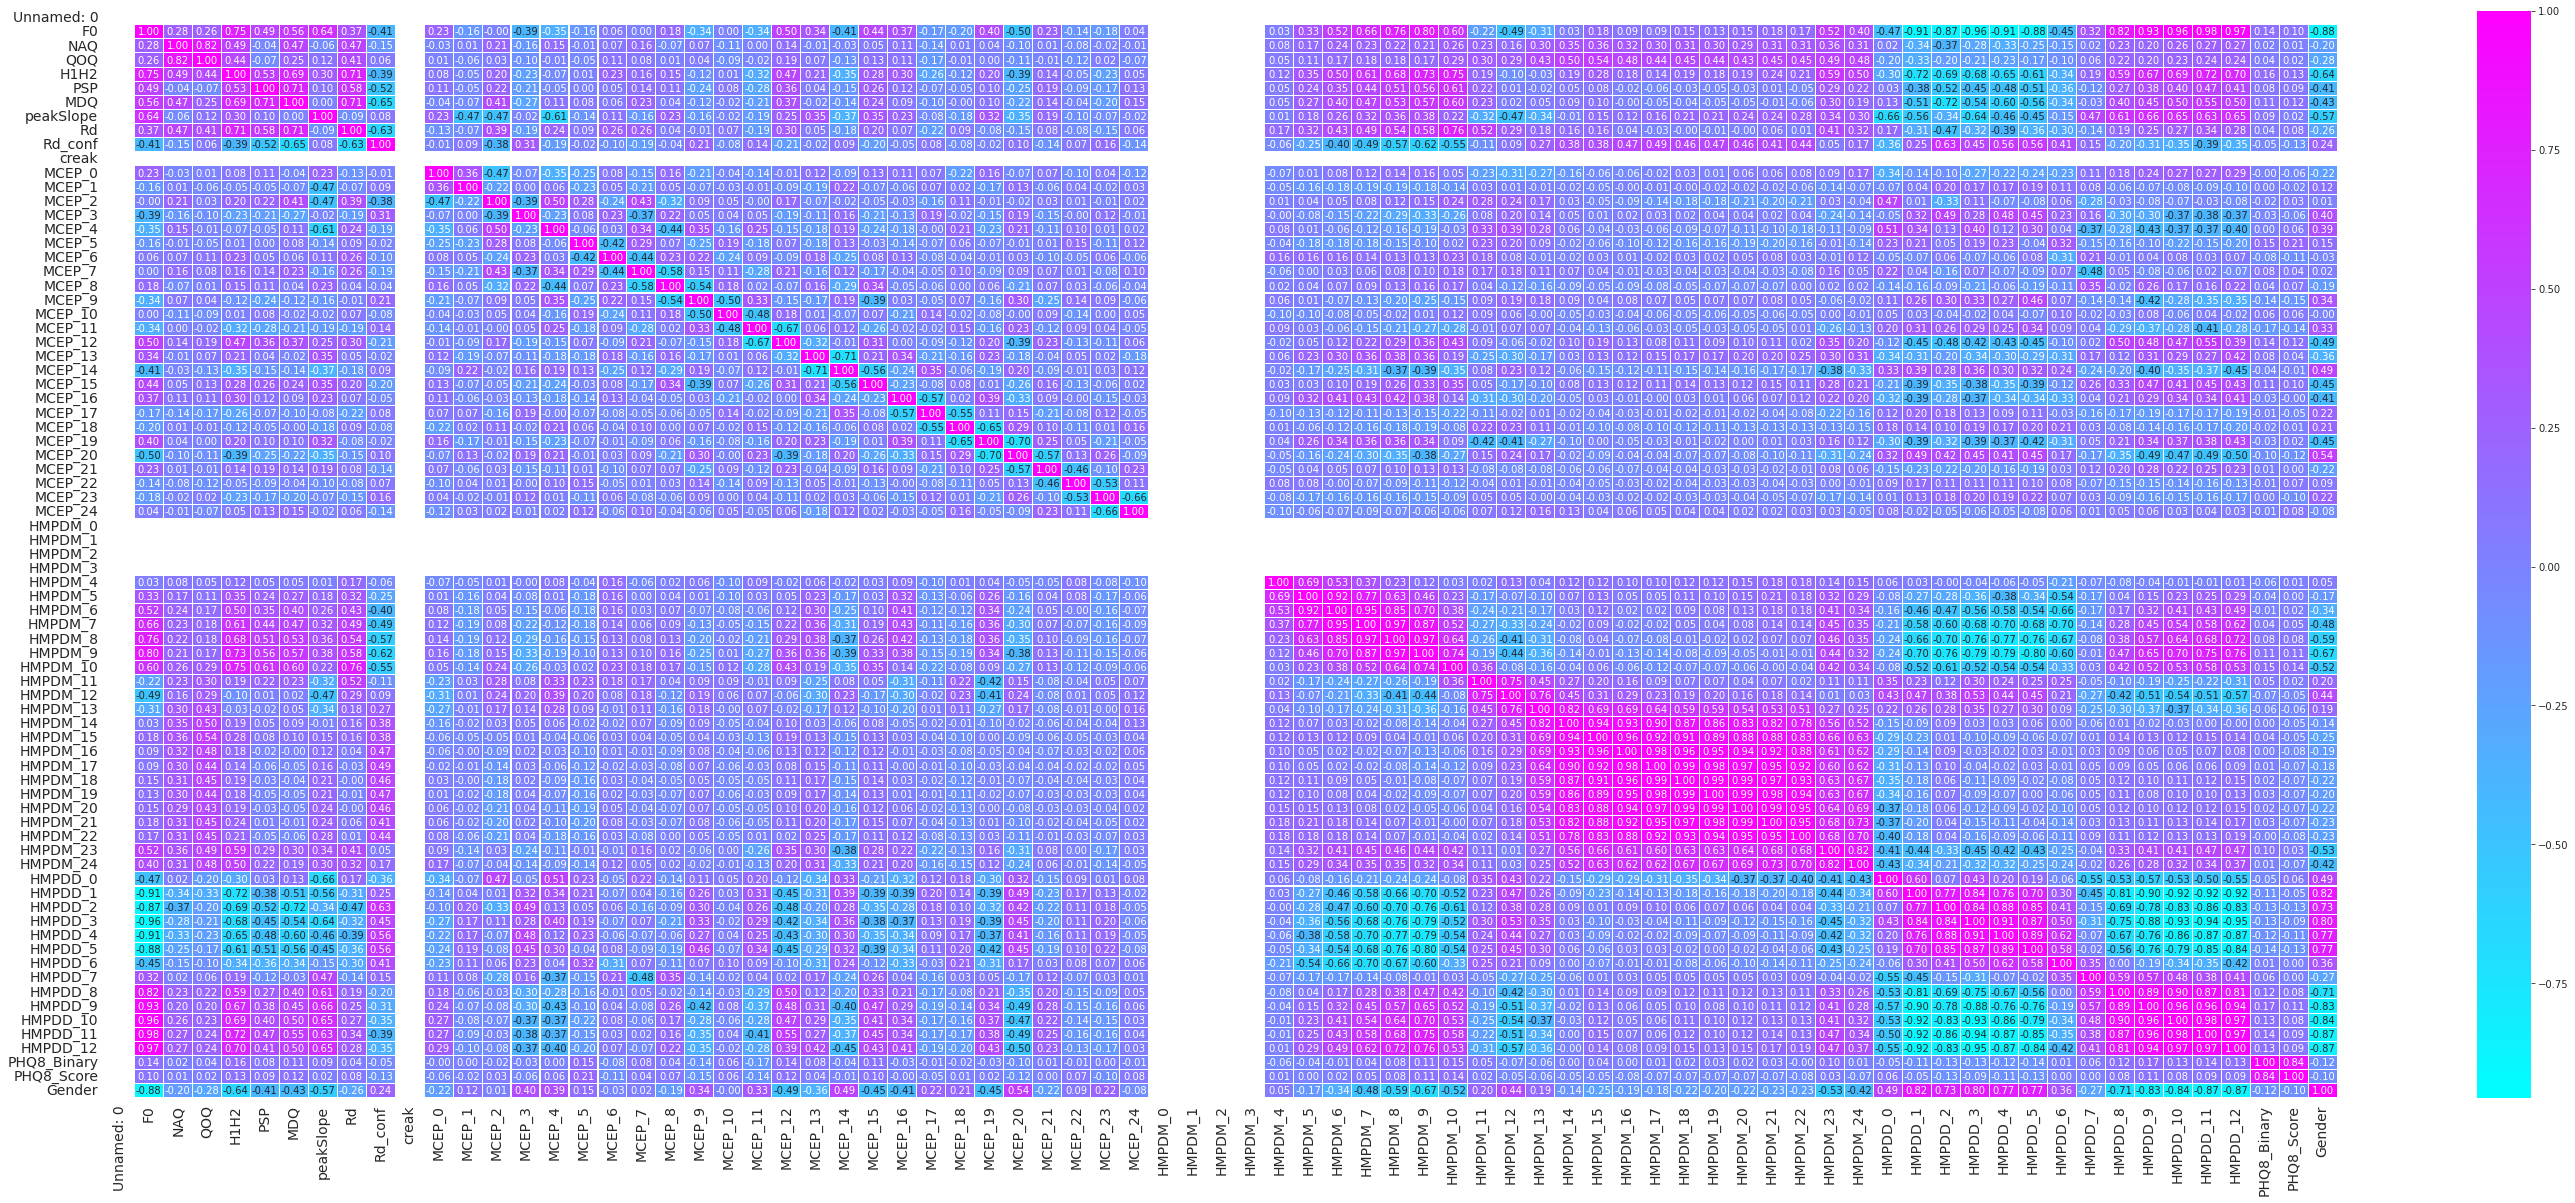

In [ ]:
#another way of visualizing it is with the heatmap
fig = plt.subplots(figsize=[50,20])
sns.heatmap(data.corr(),  annot=True, linewidths=0.05, fmt= '.2f',cmap='cool')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show() 

In [ ]:
#Select features with high correlation with label (PHQ8_Binary). Threshold of 0.05 was selected by the above figure of sorted correlation values
cor = data.corr()['PHQ8_Binary']
cor.dropna(inplace=True)
indexes = cor[(cor <= 0.05) & (cor >=-0.05)].index

cor.drop(indexes, inplace = True)

# cor.info()



In [ ]:
#create new dataframe (data_new) with only highly correlated features
data_new = data[cor.index]
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   F0           189 non-null    float64
 1   H1H2         189 non-null    float64
 2   PSP          189 non-null    float64
 3   MDQ          189 non-null    float64
 4   peakSlope    189 non-null    float64
 5   MCEP_5       189 non-null    float64
 6   MCEP_6       189 non-null    float64
 7   MCEP_7       189 non-null    float64
 8   MCEP_9       189 non-null    float64
 9   MCEP_10      189 non-null    float64
 10  MCEP_11      189 non-null    float64
 11  MCEP_12      189 non-null    float64
 12  MCEP_13      189 non-null    float64
 13  MCEP_15      189 non-null    float64
 14  MCEP_20      189 non-null    float64
 15  HMPDM_4      189 non-null    float64
 16  HMPDM_8      189 non-null    float64
 17  HMPDM_9      189 non-null    float64
 18  HMPDM_10     189 non-null    float64
 19  HMPDM_12

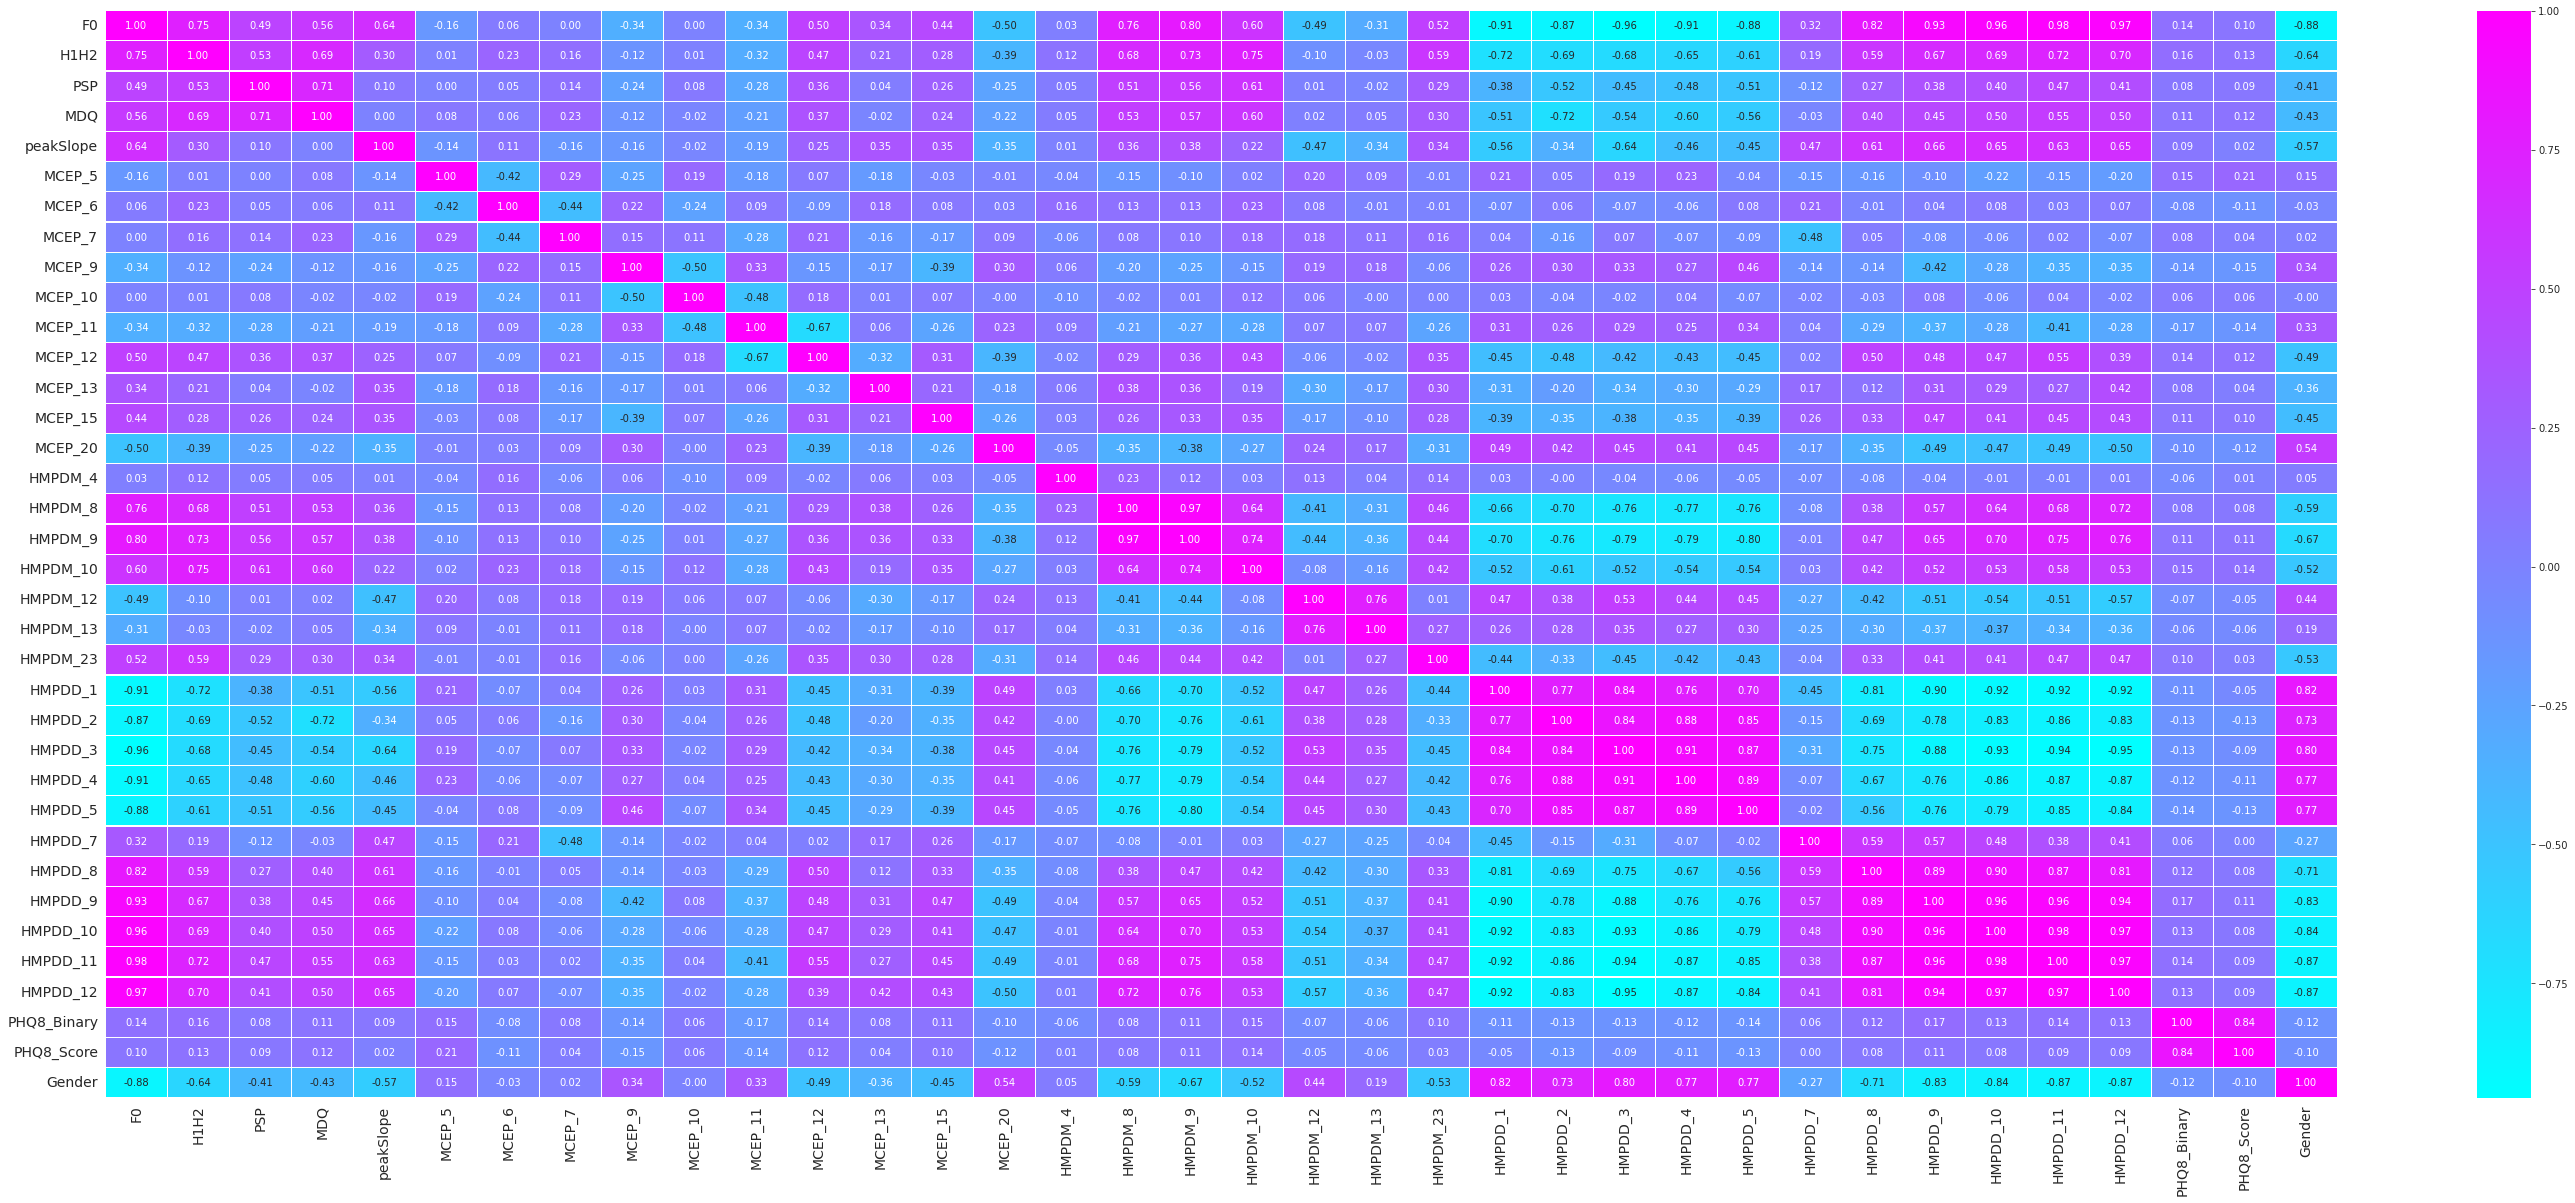

In [ ]:
#Visualize new dataframe correlations with the label
fig = plt.subplots(figsize=[50,20])
sns.heatmap(data_new.corr(),  annot=True, linewidths=0.05, fmt= '.2f',cmap='cool')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show() 

#### Train-test splitting of data

Since data is highly imbalanced (1's are 1/3), we balance training data using SMOTE

In [ ]:

#train-test split
train, test = train_test_split(data_new, test_size = 0.30, train_size = 0.70, random_state=0)

#store columns with labels and score and drop them from dataframe
train_labels = train['PHQ8_Binary']
train_phq_score = train['PHQ8_Score']
test_labels = test['PHQ8_Binary']
test_phq_score = test['PHQ8_Score']
train.drop('PHQ8_Binary', axis = 1, inplace = True)
train.drop('PHQ8_Score', axis = 1, inplace = True)
test.drop('PHQ8_Binary', axis = 1, inplace = True)
test.drop('PHQ8_Score', axis = 1, inplace = True)

#Balance training data using SMOTE
balance = SMOTE(sampling_strategy='auto')
train, train_labels = balance.fit_resample(train, train_labels)

train_labels.value_counts()

# print(train.shape)
# print(test.shape)

0.0    96
1.0    96
Name: PHQ8_Binary, dtype: int64

### Dimensionality reduction with PCA
using 3 principal components

In [ ]:
pca = PCA(n_components=3)
pca.fit(train)
train_pca = pca.transform(train)

train_pca.shape

(192, 3)

Visualize 2 principal components transformation

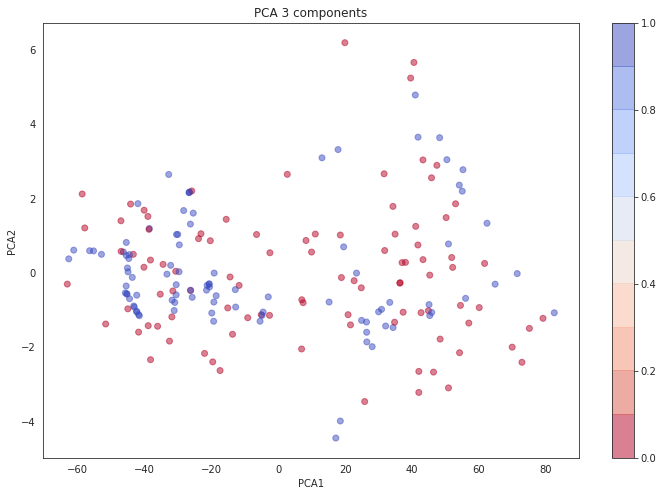

In [ ]:
plt_pic = plt.figure(figsize=(12,8))
plt.scatter(train_pca[:,0],train_pca[:,1], c = train_labels, alpha =0.5 , cmap = plt.cm.get_cmap('coolwarm_r',10))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA 3 components')
plt.colorbar();

## Modelling
Logistic Regression
Random Forest
Gradient Boosting


### Logistic Regression

In [ ]:

logReg = LogisticRegressionCV(penalty='l2', cv = 5, max_iter = 10000)
logReg.fit(train_pca, train_labels)
test_pca = pca.transform(test)
predicted_pca = logReg.predict(test_pca)
test_labels = test_labels.to_numpy()


print('acc',accuracy_score(test_labels, predicted_pca))
print('recall',recall_score(test_labels, predicted_pca))
print('prec',precision_score(test_labels, predicted_pca))
print('f1',f1_score(test_labels, predicted_pca))

acc 0.5789473684210527
recall 0.45
prec 0.4090909090909091
f1 0.4285714285714286


Check predicted labels vs true labels

In [ ]:
print(predicted_pca)
print(test_labels)

[1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 0.]


### Random Forest

In [ ]:

rf = RandomForestClassifier(n_estimators = 10000)

rf.fit(train, train_labels)
predicted_rf = rf.predict(test)
# test_labels = test_labels.to_numpy()


print('acc',accuracy_score(test_labels, predicted_rf))
print('recall',recall_score(test_labels, predicted_rf))
print('prec',precision_score(test_labels, predicted_rf))
print('f1',f1_score(test_labels, predicted_rf))

acc 0.5263157894736842
recall 0.1
prec 0.18181818181818182
f1 0.12903225806451613


### Gradient Boosting

In [ ]:

gbm = GradientBoostingClassifier(learning_rate = 0.0001, n_estimators = 10000)

gbm.fit(train_pca, train_labels)
predicted_gbm = gbm.predict(test_pca)
# test_labels = test_labels.to_numpy()


print('acc',accuracy_score(test_labels, predicted_gbm))
print('recall',recall_score(test_labels, predicted_gbm))
print('prec',precision_score(test_labels, predicted_gbm))
print('f1',f1_score(test_labels, predicted_gbm))

acc 0.5789473684210527
recall 0.3
prec 0.375
f1 0.33333333333333326


Logistic Regression from 3 principal components transformation was the one that achieved higher performance scores. Accuracy was the same as Gradient Boosting, but recall, precision and f1 score were higher with logistic regression